In [2]:
import pandas as pd, numpy as np, seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# MPL Settings
import matplotlib as mpl,  matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300

In [4]:
wnba = pd.read_csv('src/wnba-player-stats-2017.zip')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [6]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]


(wnba.style
#     .applymap(color_negative_red, subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])
#     .format({'total_amt_usd_pct_diff': "{:.2%}"})
    .set_table_styles(styles))

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.201,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.3294,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.8754,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.5435,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.4694,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32,7,20,35,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63,21.7993,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81,22.9176,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100,1,14,15,5,4,3,3,24,0,0
7,Allie Quigley,CHI,G,178,64,20.1995,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52,70,150,46.7,40,46,87,9,83,92,95,20,13,59,442,0,0
8,Allisha Gray,DAL,G,185,76,22.206,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
9,Allison Hightower,WAS,G,178,77,24.3025,US,"June 4, 1988",29,LSU,5,7,103,14,38,36.8,2,11,18.2,6,6,100,3,7,10,10,5,0,2,36,0,0


In [7]:
wnba.head()
wnba.tail()
wnba.shape

parameter = wnba['Games Played'].max()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


(143, 32)

In [8]:
sample = wnba.sample(n=30, random_state=1)

statistic = sample['Games Played'].max()
sampling_error = parameter - statistic

print(parameter, statistic, sampling_error)

32 30 2


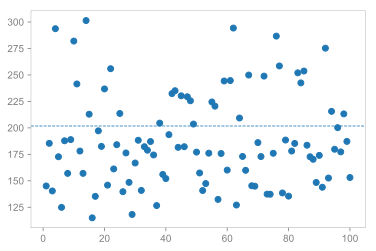

In [9]:
sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean(), ls='dashed', lw='0.8')
plt.show()

Which position gets the most points?

In [10]:
wnba['Pts_per_game'] = wnba['PTS']/wnba['Games Played']

# Create dictionary of data frames, each one called by the key name:
group_dict = {key: wnba.loc[value] for key, value in wnba.groupby("Pos").groups.items()}
# Export resuls of operations to new dictionary:
res_dict = {key: group_dict[key]['Pts_per_game'].sample(n=10, random_state = 0).mean() for (key, value) in group_dict.items()}

position_most_points = max(res_dict, key=res_dict.get)
print(position_most_points)

C


,Games Played,Played Range
0,8,12 or less
1,30,23 or more
2,26,23 or more
3,31,23 or more
4,24,23 or more
5,14,22 or less
6,16,22 or less
7,26,23 or more
8,30,23 or more
9,7,12 or less


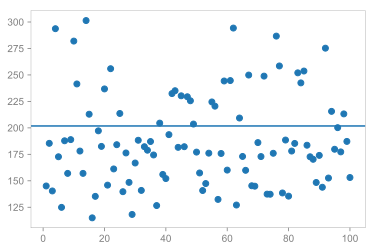

In [11]:
# Set bins based on values
wnba['Played Range'] = pd.cut(wnba['Games Played'], [0,12,22, wnba['Games Played'].max()], \
        include_lowest=False, right=True, labels=['12 or less', '22 or less', '23 or more'])
                                                                                                 
wnba[['Games Played', 'Played Range']].head(20)                                                                                              

sample_list = [wnba.PTS.sample(n=10, random_state=i).mean() for i in range(100)]

plt.scatter(range(1,101), sample_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [12]:
for i in range(3):
    print('Outputting sample {}:'.format(i))
    print(wnba.PTS.sample(n=5, random_state=i))

Outputting sample 0:
45     376
118     81
16      31
56       9
22     238
Name: PTS, dtype: int64
Outputting sample 1:
78     207
116     87
31      54
5       26
125    398
Name: PTS, dtype: int64
Outputting sample 2:
97     191
119     96
48     252
54      13
101     96
Name: PTS, dtype: int64


In [13]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [14]:
# List of dataframes
data_list = []
for i in range(100):
    df_a = wnba[wnba['Played Range'] == '23 or more'].sample(n=7, random_state=i)
    df_b = wnba[wnba['Played Range'] == '22 or less'].sample(n=2, random_state=i)
    df_c = wnba[wnba['Played Range'] == '12 or less'].sample(n=1, random_state=i)
    df_m = pd.concat([df_a, df_b, df_c])
    data_list.append(df_m)
 
# List of means
means_list = [i['PTS'].mean() for i in data_list]

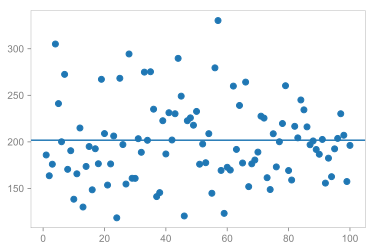

In [15]:
plt.scatter(range(1, 101), means_list)
plt.axhline(wnba.PTS.mean())
plt.show()

In [16]:
print(wnba['MIN'].value_counts(bins = 5, normalize = True))
wnba.head()
# wnba[['MIN', 'Mins_Bin']].head()

(213.2, 414.4]     0.223776
(615.6, 816.8]     0.202797
(10.993, 213.2]    0.202797
(816.8, 1018.0]    0.195804
(414.4, 615.6]     0.174825
Name: MIN, dtype: float64


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,Played Range
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,28,12,3,6,12,93,0,0,11.625000,12 or less
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,101,72,63,13,40,217,0,0,7.233333,23 or more
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,40,78,22,3,24,218,0,0,8.384615,23 or more
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,169,65,20,10,38,188,2,0,6.064516,23 or more
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,12,12,7,0,14,50,0,0,2.083333,23 or more


In [17]:
wnba['Team'].unique()

sample_teams = list(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))
print(sample_teams)

# Filter DF on multiple values
cluster = wnba.loc[wnba['Team'].isin(sample_teams)]
metrics = ['Height', 'Age', 'BMI', 'PTS']
orig_dict = wnba[metrics].mean().to_dict()
clust_dict = cluster[metrics].mean().to_dict()
print(orig_dict)
print(clust_dict)

sampling_error_height = orig_dict[metrics[0]] - clust_dict[metrics[0]]
sampling_error_age = orig_dict[metrics[1]] - clust_dict[metrics[1]]
sampling_error_BMI = orig_dict[metrics[2]] - clust_dict[metrics[2]]
sampling_error_points = orig_dict[metrics[3]] - clust_dict[metrics[3]]

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

['PHO', 'IND', 'MIN', 'ATL']
{'Height': 184.56643356643357, 'Age': 27.076923076923077, 'BMI': 23.091214227746466, 'PTS': 201.7902097902098}
{'Height': 184.6304347826087, 'Age': 28.47826086956522, 'BMI': 22.86025978608696, 'PTS': 229.58695652173913}


In [18]:
print(sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


In [19]:
print(orig_dict[metrics[0]])
print(clust_dict['Height'])

184.56643356643357
184.6304347826087


In [20]:
print(sampling_error_height)

-0.06400121617511445


In [21]:
print(clust_dict['Height'])

184.6304347826087


In [22]:
# Grouped Frequency by customised bins
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
# pd.Series(
wnba.groupby(pd.cut(wnba['PTS'], intervals), as_index=False).size().reset_index()
#     )

,PTS,0
0,"(0, 60]",30
1,"(60, 120]",25
2,"(120, 180]",17
3,"(180, 240]",22
4,"(240, 300]",15
5,"(300, 360]",7
6,"(360, 420]",11
7,"(420, 480]",7
8,"(480, 540]",4
9,"(540, 600]",5


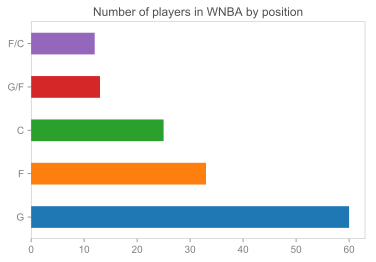

In [23]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

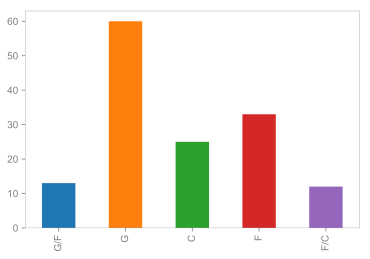

In [24]:
wnba['Pos'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot=90)

Text(0,0.5,'')

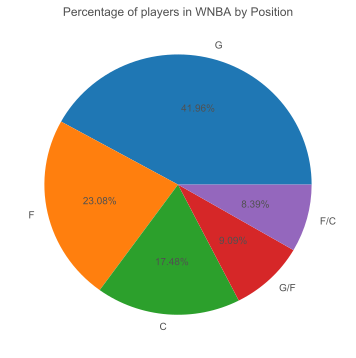

In [25]:
# Pie
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), \
title = 'Percentage of players in WNBA by Position', autopct = '%.2f%%')

# csfont = {'fontname':'Arial'}
# hfont = {'fontname':'Arial'}

plt.ylabel('')
# plt.title('Percentage of players in WNBA by Position',**csfont)
# plt.xlabel('', **hfont)
plt.show()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

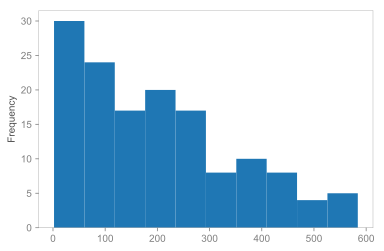

In [26]:
wnba['PTS'].plot.hist()
wnba['PTS'].describe()

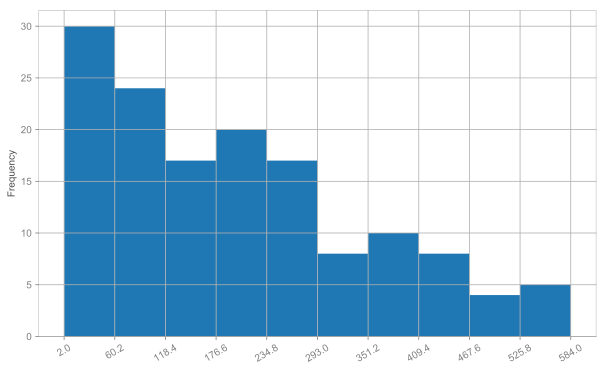

In [27]:
# Histogram with Grid
wnba['PTS'].plot.hist(grid = True, xticks = np.arange(2,585,58.2), rot = 30, figsize = (10,6))

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

(1.969, 5.0]     5
(5.0, 8.0]       4
(8.0, 11.0]      3
(11.0, 14.0]     5
(14.0, 17.0]     6
(17.0, 20.0]     8
(20.0, 23.0]    15
(23.0, 26.0]    18
(26.0, 29.0]    48
(29.0, 32.0]    31
Name: Games Played, dtype: int64

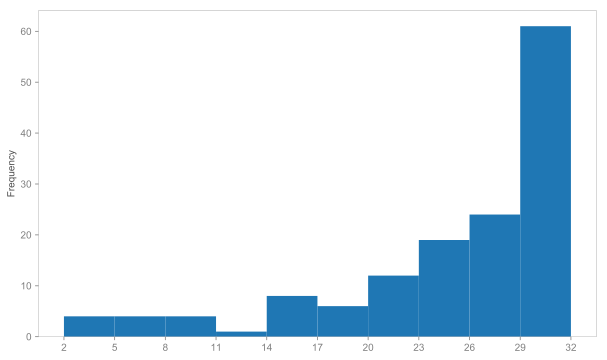

In [28]:
wnba['Games Played'].describe()
wnba['Games Played'].value_counts(bins = 10).sort_index()

# Use min, max and bin width from value counts above (max + 1 for final x label)
wnba['Games Played'].plot.hist(grid = False, xticks = np.arange(2,33,3), rot = 0, figsize = (10,6))

Text(0.5,1,'The distribution of players by games played')

Text(0.5,0,'Games played')

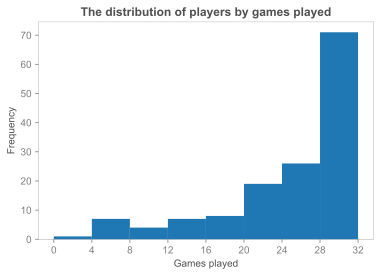

In [29]:
mpl.rc('axes',edgecolor='grey')
wnba['Games Played'].plot.hist(range = (0,32), bins = 8, xticks = range(0,33,4),)

plt.title("The distribution of players by games played",fontweight="bold")
plt.xlabel("Games played")
# plt.savefig('Games_Played.png')

## Comparing Frequency Distributions

Years in WNBA	Label  
0 Rookie  
1-3	Little experience  
4-5	Experienced  
5-10	Very experienced  
\>10	Veteran

In [30]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 34 columns):
Name            143 non-null object
Team            143 non-null object
Pos             143 non-null object
Height          143 non-null int64
Weight          142 non-null float64
BMI             142 non-null float64
Birth_Place     143 non-null object
Birthdate       143 non-null object
Age             143 non-null int64
College         143 non-null object
Experience      143 non-null object
Games Played    143 non-null int64
MIN             143 non-null int64
FGM             143 non-null int64
FGA             143 non-null int64
FG%             143 non-null float64
15:00           143 non-null int64
3PA             143 non-null int64
3P%             143 non-null float64
FTM             143 non-null int64
FTA             143 non-null int64
FT%             143 non-null float64
OREB            143 non-null int64
DREB            143 non-null int64
REB             143 non-null int64
AST

In [31]:
wnba.Experience.unique()

array(['2', '12', '4', '6', 'R', '8', '5', '3', '1', '9', '10', '11', '7',
       '13', '14', '15'], dtype=object)

Since there is a non-numeric character in 'Experienced', we need to convert this before grouping numerically.

In [32]:
wnba['ExpInt'] = pd.to_numeric(wnba.Experience, errors='coerce').fillna(0).astype(np.int64)

In [33]:
# Can also be converted within the function
exp_labels = ['Rookie','Little experience','Experienced', 'Very experienced', 'Veteran']
wnba['Exp_ordinal'] = pd.cut(pd.to_numeric(wnba.Experience, errors='coerce').fillna(0).astype(np.int64), \
                             [0, 1, 4, 6, 11, np.inf],
                             labels=exp_labels,
                            include_lowest=True, right=False)

In [34]:
wnba[['Name','Team', 'Pos', 'Birthdate', 'Age', 'Experience', 'ExpInt', 'Exp_ordinal']].head(20)

,Name,Team,Pos,Birthdate,Age,Experience,ExpInt,Exp_ordinal
0,Aerial Powers,DAL,F,"January 17, 1994",23,2,2,Little experience
1,Alana Beard,LA,G/F,"May 14, 1982",35,12,12,Veteran
2,Alex Bentley,CON,G,"October 27, 1990",26,4,4,Experienced
3,Alex Montgomery,SAN,G/F,"December 11, 1988",28,6,6,Very experienced
4,Alexis Jones,MIN,G,"August 5, 1994",23,R,0,Rookie
5,Alexis Peterson,SEA,G,"June 20, 1995",22,R,0,Rookie
6,Alexis Prince,PHO,G,"February 5, 1994",23,R,0,Rookie
7,Allie Quigley,CHI,G,"June 20, 1986",31,8,8,Very experienced
8,Allisha Gray,DAL,G,"October 20, 1992",24,2,2,Little experience
9,Allison Hightower,WAS,G,"June 4, 1988",29,5,5,Experienced


Years in WNBA	Label  
0 Rookie  
1-3	Little experience  
4-5	Experienced  
5-10	Very experienced  
\>10	Veteran

In [35]:
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

In [36]:
rookies.Pos.value_counts()

G      14
F       4
C       4
F/C     1
Name: Pos, dtype: int64

In [37]:
subset = [rookies 
, little_xp 
, experienced
, very_xp 
, veterans ]

In [38]:
print(subset[1].head())

               Name Team Pos  Height  Weight        BMI Birth_Place  \
0     Aerial Powers  DAL   F     183    71.0  21.200991          US   
8      Allisha Gray  DAL   G     185    76.0  22.205990          US   
11    Alyssa Thomas  CON   F     188    84.0  23.766410          US   
12  Amanda Zahui B.   NY   C     196   113.0  29.414827          SE   
13     Amber Harris  CHI   F     196    88.0  22.907122          US   

           Birthdate  Age         College        ...         STL  BLK  TO  \
0   January 17, 1994   23  Michigan State        ...           3    6  12   
8   October 20, 1992   24  South Carolina        ...          47   19  37   
11  December 4, 1992   24        Maryland        ...          48   11  87   
12    August 9, 1993   24       Minnesota        ...           4    5  12   
13  January 16, 1988   29          Xavier        ...           3    9   6   

    PTS  DD2  TD3  Pts_per_game  Played Range  ExpInt        Exp_ordinal  
0    93    0    0     11.625000    

In [39]:
for k, v in list(locals().items()):
         for s in subset:
            if v is s:
                print(k)
#                 print('{}_distro'.format(k)) #= v.Pos.value_counts()

rookies
little_xp
experienced
very_xp
veterans


In [40]:
rookies_distro = rookies.Pos.value_counts()
little_xp_distro = little_xp.Pos.value_counts()
experienced_distro = experienced.Pos.value_counts()
very_xp_distro = very_xp.Pos.value_counts()
veterans_distro = veterans.Pos.value_counts()

In [41]:
print(rookies_distro)
print(little_xp_distro)
print(experienced_distro)
print(very_xp_distro)
print(veterans_distro)

G      14
F       4
C       4
F/C     1
Name: Pos, dtype: int64
G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64
G      9
C      6
F      6
G/F    2
F/C    2
Name: Pos, dtype: int64
G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64
G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


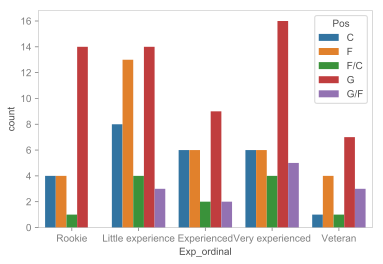

In [42]:
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba, order=exp_labels, hue_order=sorted(wnba.Pos.unique()))

In [43]:
print(sorted(wnba.Pos.unique()))

['C', 'F', 'F/C', 'G', 'G/F']


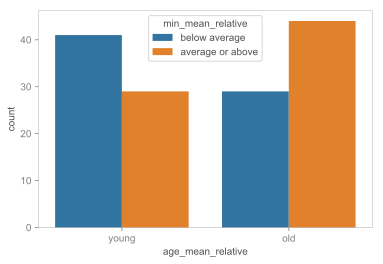

In [45]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)

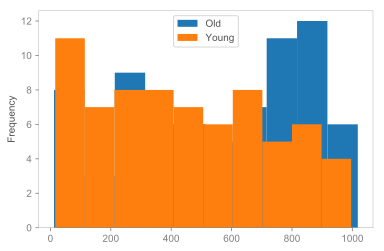

In [46]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

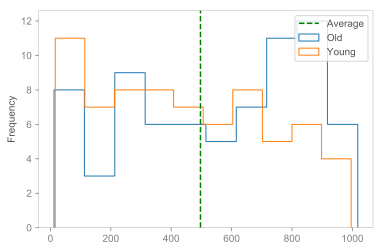

In [54]:
# Stepped Histogram
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(x=497, c='green', ls='dashed', label='Average')
plt.legend()

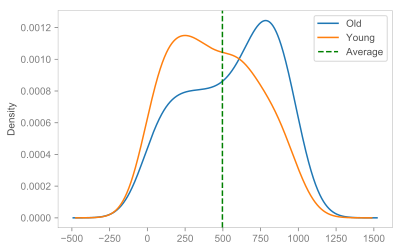

In [55]:
# Smoothed Histogram
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497, c='green', ls='dashed', label='Average')
plt.legend()

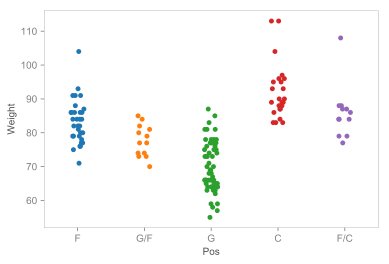

In [56]:
# Strip Plot for Weight by Position
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)

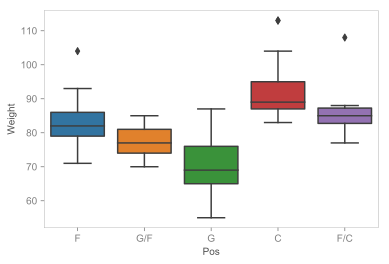

In [57]:
# Box Plots for Weight v Position
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

In [62]:
d = wnba['Games Played'].describe()
print(type(d))
print(d)

<class 'pandas.core.series.Series'>
count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [70]:
# Calculating Outliers
iqr = wnba['Games Played'].describe()['75%'] - wnba['Games Played'].describe()['25%']
lower_bound = wnba['Games Played'].describe()['25%'] - iqr * 1.5
upper_bound = wnba['Games Played'].describe()['75%'] + iqr * 1.5
print(iqr, lower_bound, upper_bound)

outliers_high = len(wnba[wnba['Games Played']>upper_bound])
outliers_low = len(wnba[wnba['Games Played']<lower_bound])

7.0 11.5 39.5


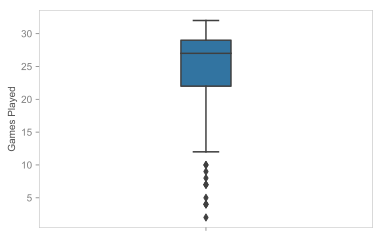

In [71]:
# Box Plot for Games Played
sns.boxplot(wnba['Games Played'], whis = 1.5,
              orient = 'vertical', width = .15)

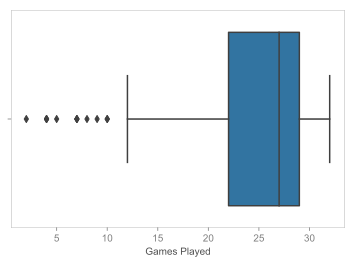

In [72]:
sns.boxplot(wnba['Games Played'])